   # Linear Regression : Car Price Prediction Case Study


A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
You are required to model the price of cars with the available independent variables.

## Reading and Understanding the Data¶
Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing dataset
car = pd.read_csv(r'C:\Users\avi140\Documents\DS\Books\PGC\linear regression\assignment\CarPrice_Assignment.csv')


In [3]:
#Let's explore the top 5 rows
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the housing dataframe

In [4]:
car.shape

(205, 26)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## Data Preparation : Phase 1
Removing Car_ID Column as it's not meaningful for our regression Analysis

Deriving CarCompany from CarName

In [6]:
car = car.drop(['car_ID'],axis = 1)

In [7]:
car['CarCompany'] = car['CarName'].str.split(" ",n=1,expand = True).loc[:,0]

In [8]:
#Replacing 'vw' with 'volkswagen'
car['CarCompany'] = car['CarCompany'].replace(regex='vw',value = 'volkswagen')
#Replacing 'vokswagen' with 'volkswagen'
car['CarCompany'] = car['CarCompany'].replace(regex='vokswagen',value = 'volkswagen')
# replacing 'maxda' with 'mazda'
car['CarCompany'] = car['CarCompany'].replace(regex='maxda',value = 'mazda')
# replacing 'Nissan' with 'nissan'
car['CarCompany'] = car['CarCompany'].replace(regex='Nissan',value = 'nissan')
# replacing 'toyouta' with 'toyota'
car['CarCompany'] = car['CarCompany'].replace(regex='toyouta',value = 'toyota')
# replacing 'porcshce' with 'porshce'
car['CarCompany'] = car['CarCompany'].replace(regex='porcshce',value = 'porshce')

In [9]:
#Similarly drivewheel has few values as '4wd' , so we'll replace them with 'fwd'

In [10]:
car['drivewheel'] = car['drivewheel'].replace(regex='4wd',value = 'fwd')

In [11]:
car.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'CarCompany'],
      dtype='object')

In [12]:
car.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Visualising the Data

We'll visualise our data using matplotlib and seaborn.
We'll also identify if some predictors directly have a strong association with the outcome variable "Price"

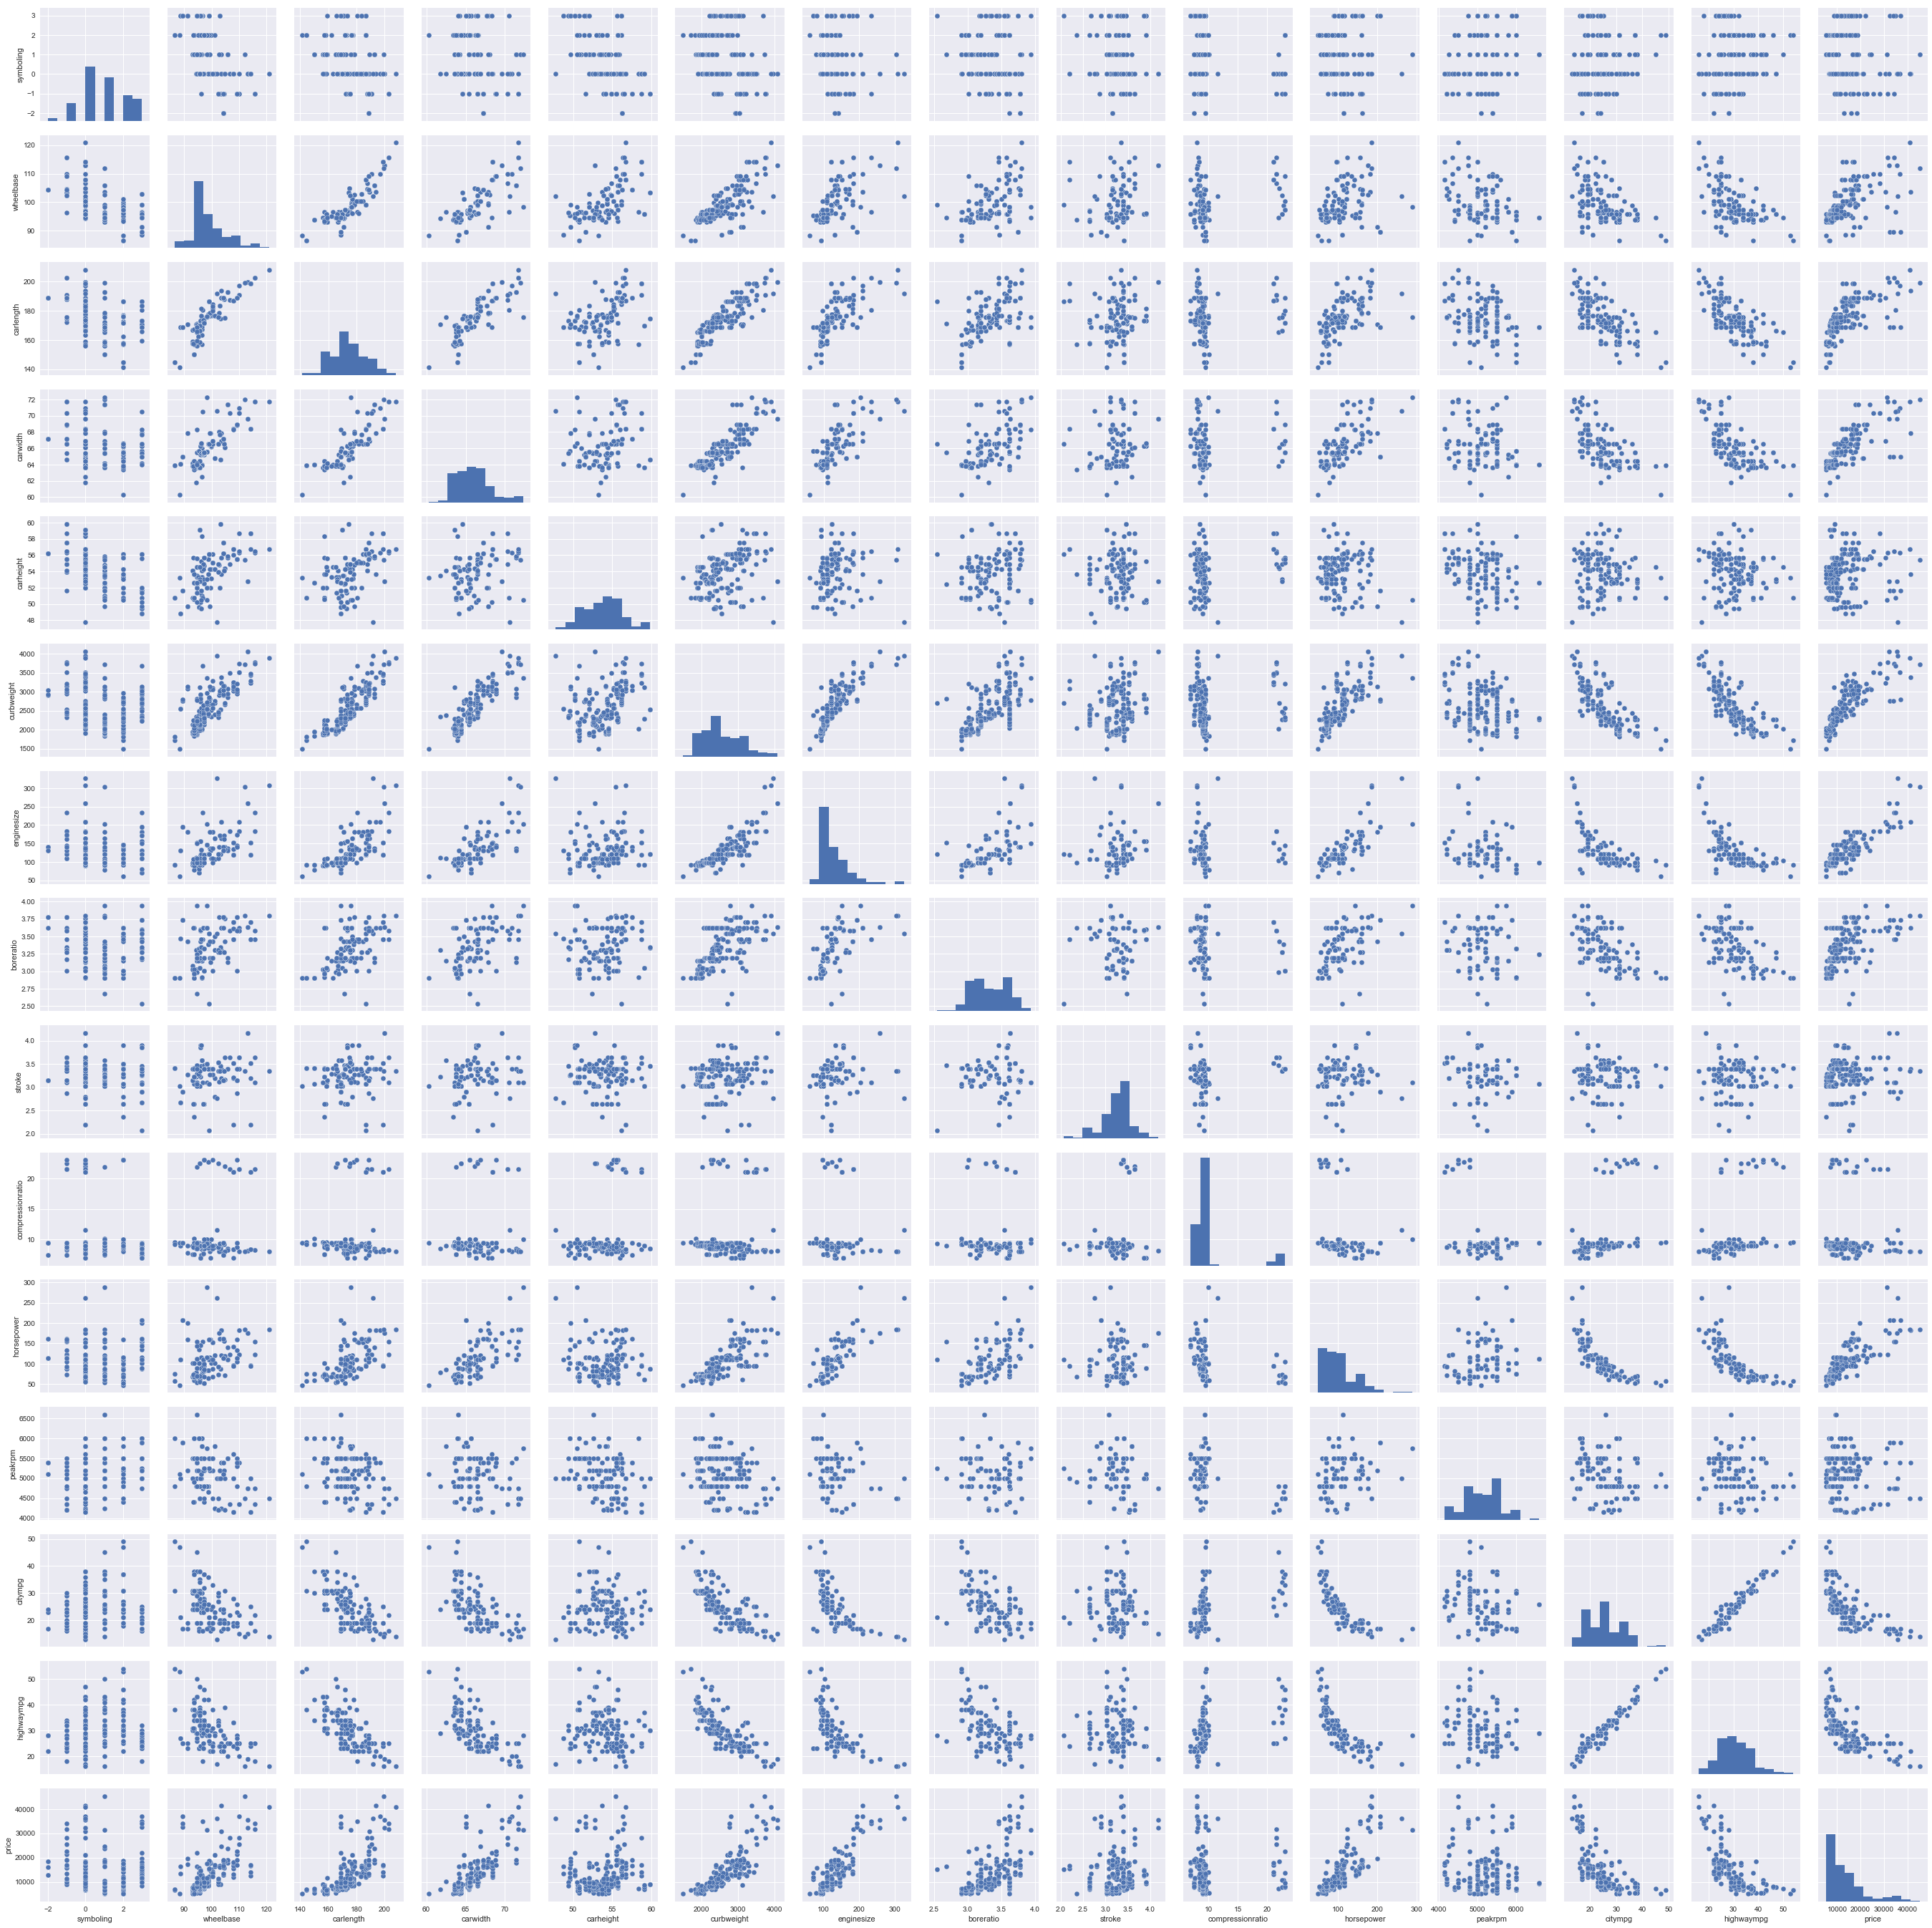

In [13]:
sns.pairplot(car)
plt.show()

## Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

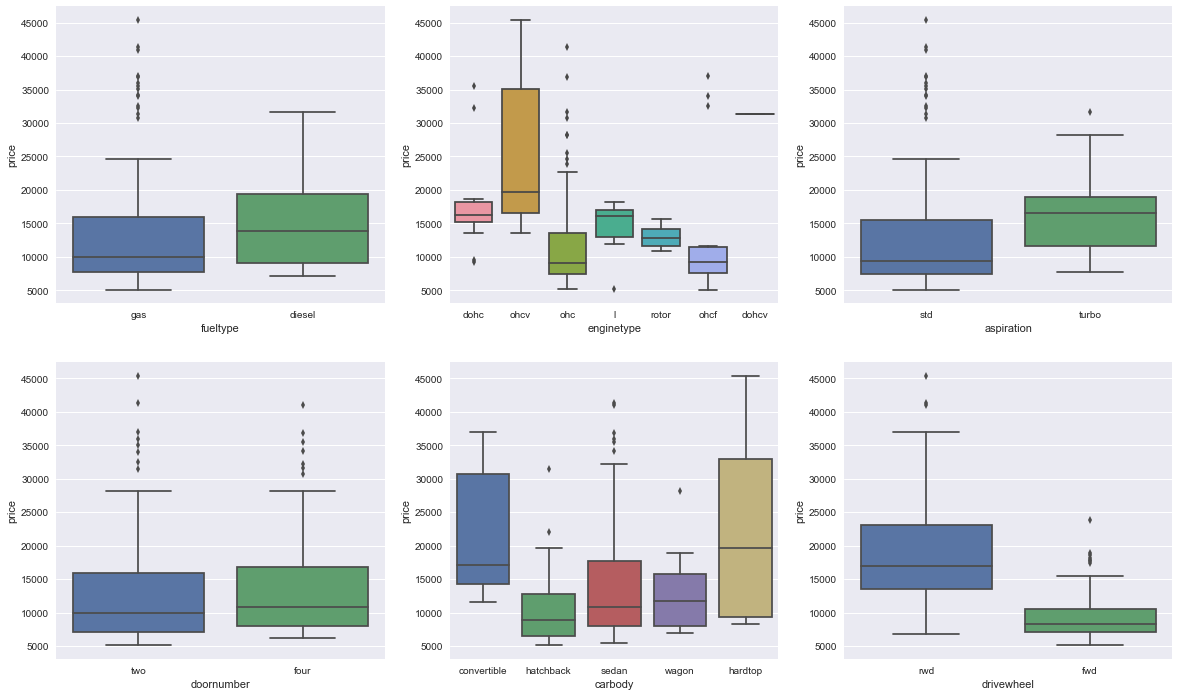

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(2,3,2)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(2,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(2,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(2,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(2,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.show()

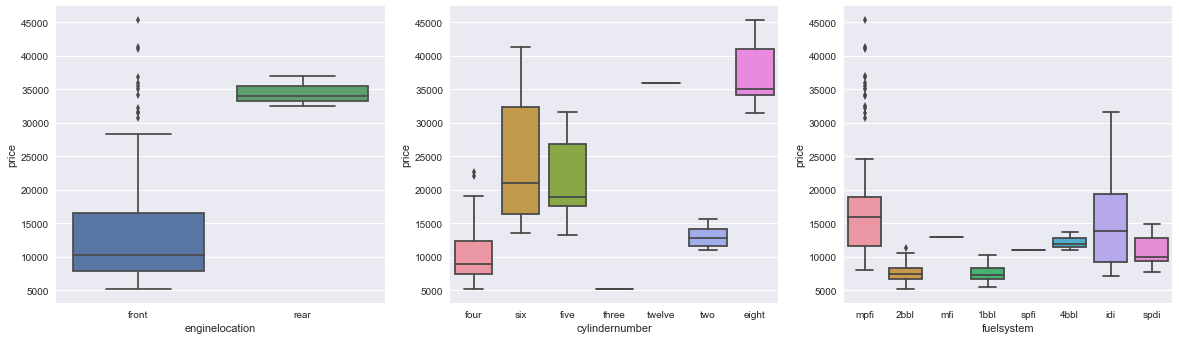

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(2,3,2)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(2,3,3)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
plt.show()

Based on fundamental instincts, we can say that theres a relationship between Company and Price, So we'll create a box plot for CarCompany vs Price

In [16]:
len(car['CarCompany'].unique())
##There are 28 Car Companies

23

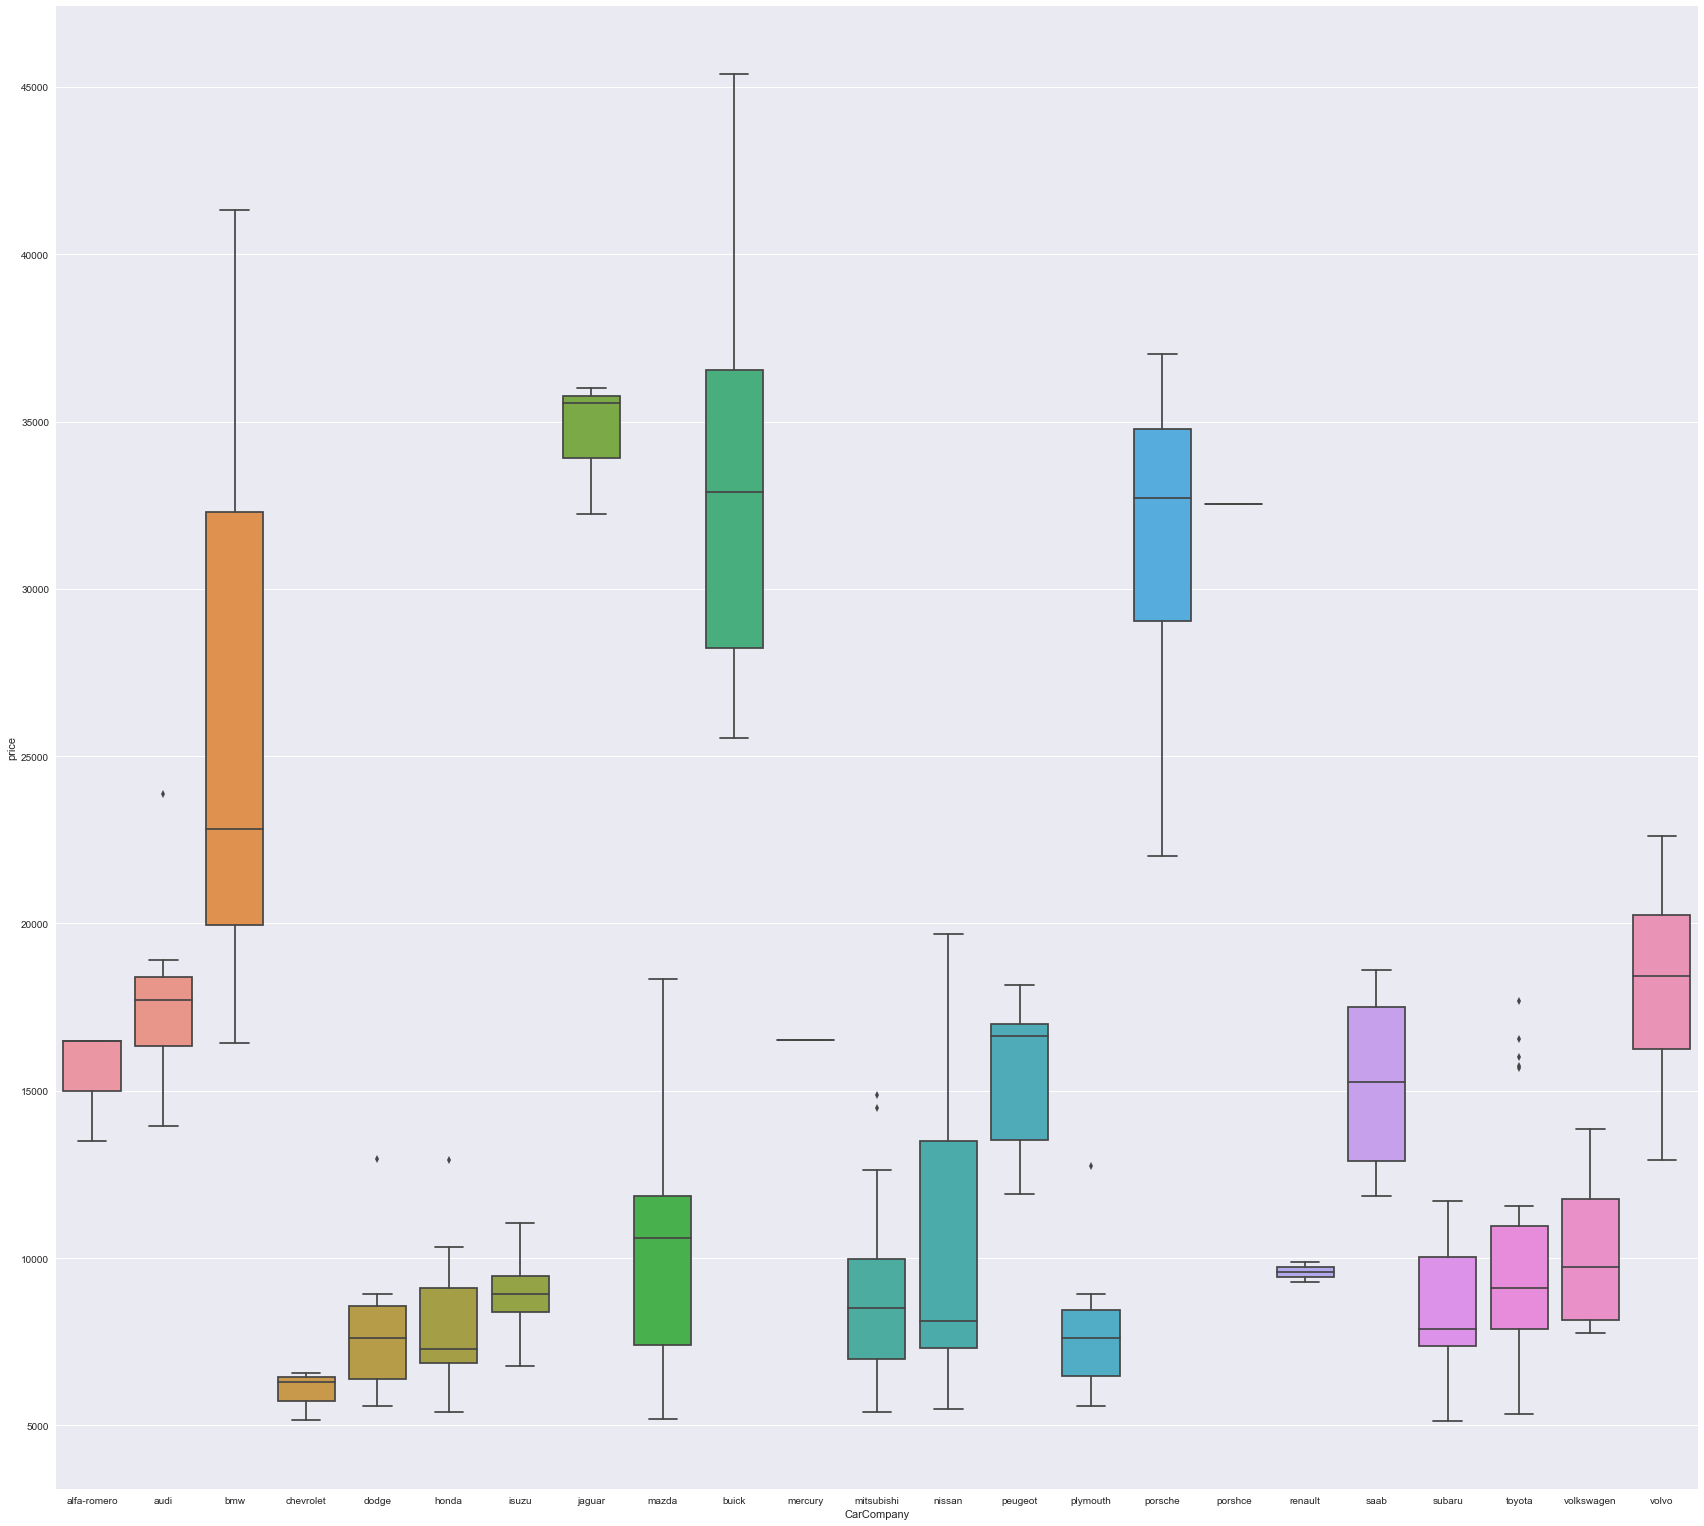

In [17]:
plt.figure(figsize=(100, 60))
plt.subplot(2,3,1)
sns.boxplot(x = 'CarCompany', y = 'price', data = car)
plt.show()
##By looking at the below mentioned Box Plots we can say that, there is a significant relation between CarCompany and price.

We can also visualise some of these categorical features parallely by using the hue argument. Below is the plot for EngineType  with FuelType as the hue.

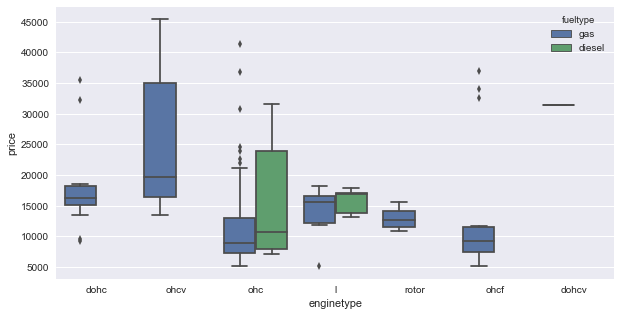

In [18]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'enginetype', y = 'price', hue = 'fueltype', data = car)
plt.show()
#By looking at thebelow plot for EngineType  with FuelType as the hue. 
#We don't see any significance difference played by fuel type in deciding price for various enginetype

## Data Preparation: Phase 2

### Dummy Variables

For example: The variable fueltype has two levels. We need to convert these two levels into integer as well.

For this, we will use something called dummy variables.
As we know, we need only n-1 variable when n 

In [19]:
# Get the dummy variables for the feature 'fueltype' and store it in a new variable - 'Is_gas'
is_gas = pd.get_dummies(car['fueltype'])

In [20]:
is_gas.head()
#Only one varible gas is enough t identify whether the vehicle is gas or diesel

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [21]:
# Let's drop the first column from status df using 'drop_first = True'

is_gas = pd.get_dummies(car['fueltype'], drop_first = True)

In [22]:
# Add the results to the original car dataframe

car = pd.concat([car, is_gas], axis = 1)

In [23]:
# Now let's see the head of our dataframe.

car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,gas
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1
4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1


In [24]:
# Drop 'fueltype' as we have created the dummies for it, Also Drop CarName as it's not required anymore

car.drop(['fueltype'], axis = 1, inplace = True)
car.drop(['CarName'],axis =1 , inplace = True)


Converting String Numbering to Numeric for DooNumber and Cylinder 

In [25]:
# List of variables to map

varlist =  ['doornumber', 'cylindernumber']

# Defining the map function
def binary_map(x):
    return x.map({'two': 2, "three": 3,'four': 4, "five": 5,'six': 6, "eight": 8,"twelve":12})

# Applying the function to the housing list
car[varlist] = car[varlist].apply(binary_map)

In [26]:
car.head()

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,gas
0,3,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1
1,3,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1
2,1,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1
3,2,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1
4,2,std,4,sedan,fwd,front,99.4,176.6,66.4,54.3,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1


In [27]:
#Creating Dummy Variable for CarCompany
#Get the dummy variables for the feature 'CarCompany' and store it in a new variable - 'Var'
Var_Company = pd.get_dummies(car['CarCompany'])

In [28]:
# Let's drop the first column from status df using 'drop_first = True'

Var_Company = pd.get_dummies(car['CarCompany'], drop_first = True)
car = pd.concat([car, Var_Company], axis = 1)

In [29]:
car.head()

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,peugeot,plymouth,porsche,porshce,renault,saab,subaru,toyota,volkswagen,volvo
0,3,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,3,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,1,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,2,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,2,std,4,sedan,fwd,front,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#Creating Dummy Variable for symboling
#Get the dummy variables for the feature 'symboling' and store it in a new variable - 'Var_symboling'
Var_symboling = pd.get_dummies(car['symboling'])

In [31]:
Var_symboling.head()

,-2,-1,0,1,2,3
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [32]:
# Let's drop the first column from status df using 'drop_first = True'

Var_symboling = pd.get_dummies(car['symboling'], drop_first = True)
car = pd.concat([car, Var_symboling], axis = 1)

In [33]:
car.head()

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,saab,subaru,toyota,volkswagen,volvo,-1,0,1,2,3
0,3,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,1
1,3,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,1
2,1,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,1,0,0
3,2,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,1,0
4,2,std,4,sedan,fwd,front,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,1,0


In [34]:
#Dropping CarCompany as Dummy variable has been created for this
car.drop(['CarCompany'], axis = 1, inplace = True)

In [35]:
#Dropping symboling as Dummy variable has been created for this
car.drop(['symboling'], axis = 1, inplace = True)

In [36]:
#Count of number of columns present in car dataframe
car.shape

(205, 50)

After Analysing the above Box Plots, It's sensible to drop enginetype and fuel system, because that adds lot of independint variable which doesn't add significant amount change in price of the car

In [37]:
car.drop(['enginetype','fuelsystem'], axis = 1, inplace = True)

In [38]:
#Creating Dummy Variable for aspiration
#Get the dummy variables for the feature 'aspiration' and store it in a new variable - 'Var_aspiration'
Var_aspiration = pd.get_dummies(car['aspiration'])
Var_aspiration = pd.get_dummies(car['aspiration'], drop_first = True)
car = pd.concat([car, Var_aspiration], axis = 1)

In [39]:
#Dropping Aspiration as Dummy variable has been created for this
car.drop(['aspiration'], axis = 1, inplace = True)

In [40]:
#Creating Dummy Variable for carbody
#Get the dummy variables for the feature 'carbody' and store it in a new variable - 'Var_carbody'
Var_carbody = pd.get_dummies(car['carbody'])
Var_carbody = pd.get_dummies(car['carbody'], drop_first = True)
car = pd.concat([car, Var_carbody], axis = 1)

In [41]:
#Dropping carbody as Dummy variable has been created for this
car.drop(['carbody'], axis = 1, inplace = True)

In [42]:
#Creating Dummy Variable for enginelocation
#Get the dummy variables for the feature 'enginelocation' and store it in a new variable - 'Var_enginelocation'
Var_enginelocation = pd.get_dummies(car['enginelocation'])
Var_enginelocation = pd.get_dummies(car['enginelocation'], drop_first = True)
car = pd.concat([car, Var_enginelocation], axis = 1)

In [43]:
#Dropping enginelocation as Dummy variable has been created for this
car.drop(['enginelocation'], axis = 1, inplace = True)

In [44]:
#Creating Dummy Variable for drivewheel
#Get the dummy variables for the feature 'drivewheel' and store it in a new variable - 'Var_drivewheel'
Var_drivewheel = pd.get_dummies(car['drivewheel'])
Var_drivewheel = pd.get_dummies(car['drivewheel'], drop_first = True)
car = pd.concat([car, Var_drivewheel], axis = 1)

In [45]:
#Dropping drivewheel as Dummy variable has been created for this
car.drop(['drivewheel'], axis = 1, inplace = True)

In [46]:
car.shape

(205, 51)

Since we have too many variables and from exploratory data analysis, we can say that below mentioned variables do not account for much variation in price. So we'll drop them for further analysis

In [47]:
#car.drop(['wheelbase','carlength','carwidth','carheight','curbweight'], axis = 1, inplace = True)

In [48]:
car.head()

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,1,2,3,turbo,hardtop,hatchback,sedan,wagon,rear,rwd
0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,1,0,0,0,0,0,0,1
1,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,1,0,0,0,0,0,0,1
2,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,1,0,0,0,1
3,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,1,0,0,0,0,1,0,0,0
4,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,1,0,0,0,0,1,0,0,0


In [49]:
car.shape

(205, 51)

## Splitting the Data into Training and Testing Sets¶
As you know, the first basic step for regression is performing a train-test split.

In [50]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Feature Uning Min-Max Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [52]:
scaler = MinMaxScaler()

In [53]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['doornumber','peakrpm','cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower'
            ,'citympg', 'highwaympg','wheelbase','carlength','carwidth','carheight','curbweight','gas','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [54]:
df_train.describe()

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,1,2,3,turbo,hardtop,hatchback,sedan,wagon,rear,rwd
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.240559,0.241351,0.497946,0.535389,...,0.300699,0.118881,0.125874,0.181818,0.020979,0.342657,0.475524,0.132867,0.006993,0.349650
std,0.498199,0.205581,0.204848,0.184517,0.215378,0.211269,0.115818,0.154619,0.207140,0.157843,...,0.460174,0.324786,0.332873,0.387050,0.143818,0.476266,0.501156,0.340624,0.083624,0.478536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.200000,0.135849,0.305556,0.464646,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.200000,0.184906,0.500000,0.545455,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.200000,0.301887,0.682540,0.611111,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
car.shape

(205, 51)

Since we have too many variables and from exploratory data analysis, we can say that below mentioned variables do not account for much variation in price. So we'll drop them for further analysis

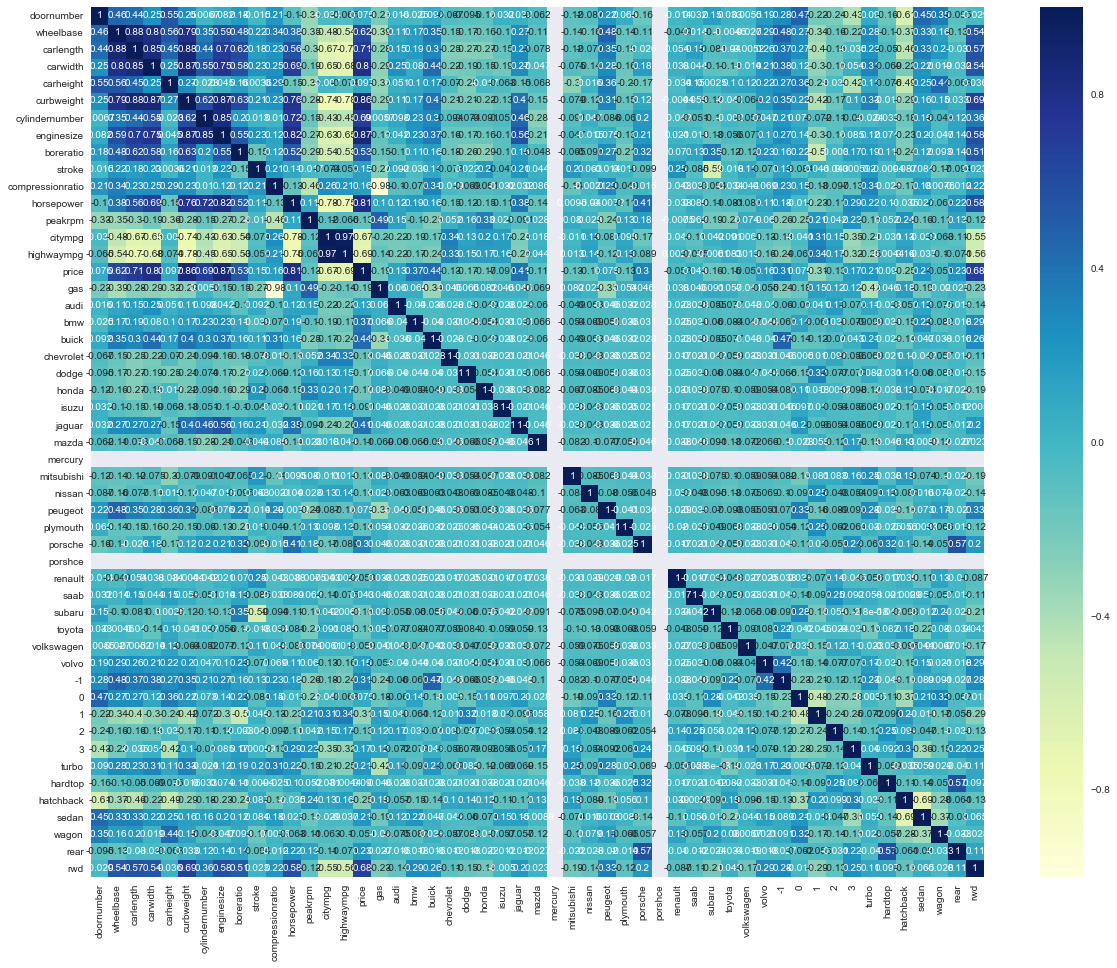

In [56]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 16))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, Horsepower seems to the correlated to price the most. Let's see a pairplot for Horsepower vs price

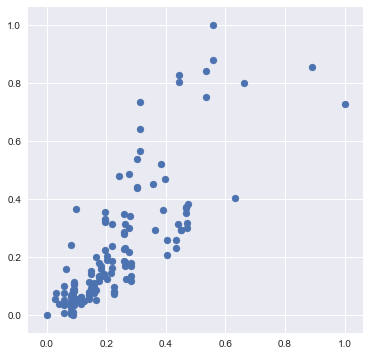

In [57]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.horsepower, df_train.price)
plt.show()

Also, enginesize and cylindernumber seems to the correlated to price the most. Let's see a pairplot for enginesize vs price

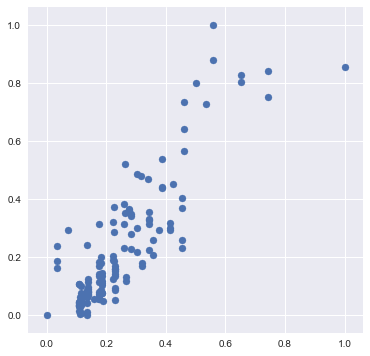

In [58]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

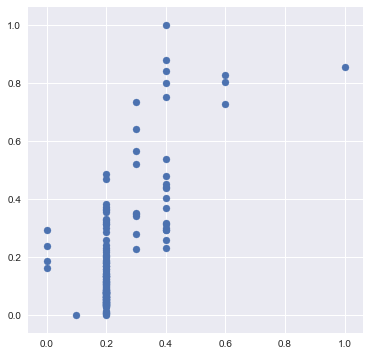

In [59]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.cylindernumber, df_train.price)
plt.show()

So, we pick horsepower as the first variable and we'll try to fit a regression line to that.

#### Dividing into X and Y sets for the model building

In [60]:
y_train = df_train.pop('price')
X_train = df_train

## Building a linear model
Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [61]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['horsepower']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [62]:
# Check the parameters obtained

lr.params

const        -0.019484
horsepower    1.050556
dtype: float64

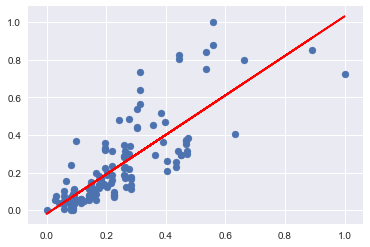

In [63]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.02 + 1.050556*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [64]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Sat, 09 Feb 2019   Prob (F-statistic):           6.04e-34
Time:                        18:08:37   Log-Likelihood:                 91.997
No. Observations:                 143   AIC:                            -180.0
Df Residuals:                     141   BIC:                            -174.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0195      0.018     -1.068      0.2

### Checking VIF

In [65]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,gas,450.17
7,enginesize,417.94
6,cylindernumber,280.95
13,citympg,240.01
14,highwaympg,238.00
2,carlength,210.81
5,curbweight,195.90
8,boreratio,171.94
3,carwidth,138.71
1,wheelbase,129.36


### Dropping the variable and updating the model

Dropping variables having higher VIF value than 5.
But from the summary, we can still see some of them have a high p-value.

In [67]:
X = X_train.drop('gas', 1,)

In [68]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [69]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     55.29
Date:                Sat, 09 Feb 2019   Prob (F-statistic):           5.69e-52
Time:                        18:08:37   Log-Likelihood:                 256.10
No. Observations:                 143   AIC:                            -416.2
Df Residuals:                      95   BIC:                            -274.0
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0524      0.119  

In [70]:
X = X.drop('doornumber', 1,)

In [71]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [72]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     57.08
Date:                Sat, 09 Feb 2019   Prob (F-statistic):           7.50e-53
Time:                        18:08:37   Log-Likelihood:                 256.09
No. Observations:                 143   AIC:                            -418.2
Df Residuals:                      96   BIC:                            -278.9
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0533      0.118  

# Model Selection using RFE
This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

Since we have df =46 it's difficult to manually approach and build a linear model
We'll be selecting 20 variables using RFE and use stats model to build linear model.

In [73]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [74]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [75]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('doornumber', False, 28),
 ('wheelbase', False, 9),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 7),
 ('horsepower', True, 1),
 ('peakrpm', False, 15),
 ('citympg', True, 1),
 ('highwaympg', False, 22),
 ('gas', False, 6),
 ('audi', False, 17),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 19),
 ('dodge', False, 13),
 ('honda', False, 16),
 ('isuzu', False, 24),
 ('jaguar', True, 1),
 ('mazda', False, 21),
 ('mercury', False, 30),
 ('mitsubishi', False, 5),
 ('nissan', False, 27),
 ('peugeot', False, 8),
 ('plymouth', False, 14),
 ('porsche', True, 1),
 ('porshce', False, 31),
 ('renault', False, 18),
 ('saab', False, 12),
 ('subaru', False, 23),
 ('toyota', False, 25),
 ('volkswagen', False, 26),
 ('volvo', True, 1),
 (-1, True, 1),
 (0, True, 1),
 (1, True, 1),
 (2, True, 1),
 (

In [76]:
col = X_train.columns[rfe.support_]
col

Index([      'carwidth',     'curbweight', 'cylindernumber',     'enginesize',
            'boreratio',         'stroke',     'horsepower',        'citympg',
                  'bmw',          'buick',         'jaguar',        'porsche',
                'volvo',               -1,                0,                1,
                      2,                3,      'hatchback',           'rear'],
      dtype='object')

In [77]:
X_train.columns[~rfe.support_]

Index(['doornumber', 'wheelbase', 'carlength', 'carheight', 'compressionratio',
       'peakrpm', 'highwaympg', 'gas', 'audi', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porshce', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'turbo', 'hardtop', 'sedan', 'wagon', 'rwd'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [78]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [79]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [80]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [81]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     110.3
Date:                Sat, 09 Feb 2019   Prob (F-statistic):           3.10e-68
Time:                        18:08:38   Log-Likelihood:                 227.78
No. Observations:                 143   AIC:                            -413.6
Df Residuals:                     122   BIC:                            -351.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0663      0.088     -0.

citympg is insignificant in presence of other variables as it has higher than threshold P value; can be dropped

In [82]:
X_train_new = X_train_rfe.drop(["citympg"], axis = 1)

In [83]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [84]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [85]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     113.6
Date:                Sat, 09 Feb 2019   Prob (F-statistic):           1.61e-68
Time:                        18:08:38   Log-Likelihood:                 225.74
No. Observations:                 143   AIC:                            -411.5
Df Residuals:                     123   BIC:                            -352.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0010      0.081     -0.

In [86]:
X_train_new.columns

Index([         'const',       'carwidth',     'curbweight', 'cylindernumber',
           'enginesize',      'boreratio',         'stroke',     'horsepower',
                  'bmw',          'buick',         'jaguar',        'porsche',
                'volvo',               -1,                0,                1,
                      2,                3,      'hatchback',           'rear'],
      dtype='object')

curbweight is insignificant in presence of other variables as it has higher than threshold P value; can be dropped

In [87]:
X_train_new = X_train_new.drop(['curbweight'], axis=1)

In [88]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [89]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [90]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     117.1
Date:                Sat, 09 Feb 2019   Prob (F-statistic):           9.03e-69
Time:                        18:08:38   Log-Likelihood:                 223.60
No. Observations:                 143   AIC:                            -409.2
Df Residuals:                     124   BIC:                            -352.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0402      0.079      0.

In [91]:
X_train_new.columns

Index([         'const',       'carwidth', 'cylindernumber',     'enginesize',
            'boreratio',         'stroke',     'horsepower',            'bmw',
                'buick',         'jaguar',        'porsche',          'volvo',
                     -1,                0,                1,                2,
                      3,      'hatchback',           'rear'],
      dtype='object')

In [92]:
#Dropping const 
X_train_new = X_train_new.drop(['const'], axis=1)

### Conclusion at this stage
R Square and Adjusted R Square has 0.944 and 0.936. Since both are close we can say that the number of variables are good. Moreover high R Square values suggest a good fit

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [93]:
y_train_price = lm.predict(X_train_lm)

In [94]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

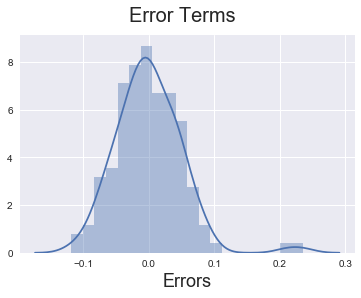

In [95]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

error terms are normally distributed which is one of the assumption while proceeding with multi Linear regression model

## Making Predictions
Applying the scaling on the test sets

In [96]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['doornumber','peakrpm','cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower'
            ,'citympg', 'highwaympg','wheelbase','carlength','carwidth','carheight','curbweight','gas','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [97]:
y_test = df_test.pop('price')
X_test = df_test

In [98]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]


In [99]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [100]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

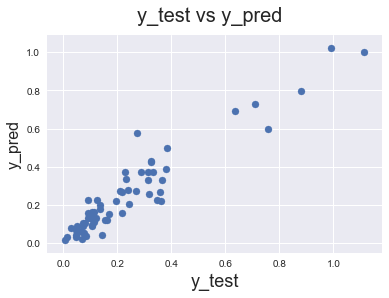

In [101]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label